In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, f1_score
sns.set()
np.random.seed(42)
print(tf.__version__)

2.0.0


In [2]:
# Load dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("X Train Shape {} and Y Train Shape {}".format(X_train.shape,y_train.shape))
print("X Test Shape {} and Y Test Shape {}".format(X_test.shape,y_test.shape))

X Train Shape (60000, 28, 28) and Y Train Shape (60000,)
X Test Shape (10000, 28, 28) and Y Test Shape (10000,)


In [4]:
# scaling feature input space
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
# LSTM model building for Ima
i = Input(shape=(X_train[0].shape))
x = LSTM(32)(i)
x = Dense(10,activation='softmax')(x)

# Define Model
model = Model(i,x)

# model compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
# train the model
hist = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 38s 641us/sample - loss: 0.6161 - accuracy: 0.8076 - val_loss: 0.2673 - val_accuracy: 0.9234
Epoch 2/10
60000/60000 [==============================] - 38s 640us/sample - loss: 0.2369 - accuracy: 0.9305 - val_loss: 0.1905 - val_accuracy: 0.9462
Epoch 3/10
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.1633 - accuracy: 0.9524 - val_loss: 0.1300 - val_accuracy: 0.9605
Epoch 4/10
60000/60000 [==============================] - 37s 611us/sample - loss: 0.1307 - accuracy: 0.9616 - val_loss: 0.1151 - val_accuracy: 0.9670
Epoch 5/10
60000/60000 [==============================] - 41s 681us/sample - loss: 0.1099 - accuracy: 0.9673 - val_loss: 0.1115 - val_accuracy: 0.9653
Epoch 6/10
60000/60000 [==============================] - 40s 664us/sample - loss: 0.0959 - accuracy: 0.9712 - val_loss: 0.0931 - val_accuracy: 0.9705
Epoch 7/10
60000/60000 [======================

In [7]:
# Check accuracy on test dataset
predict = model.predict(X_test).argmax(axis=1)
print('Test Accuracy {}'.format(accuracy_score(y_test,predict)))
print('Test F1 Score {}'.format(f1_score(y_test,predict,average='weighted'))) 

Test Accuracy 0.9774
Test F1 Score 0.9774296632828237


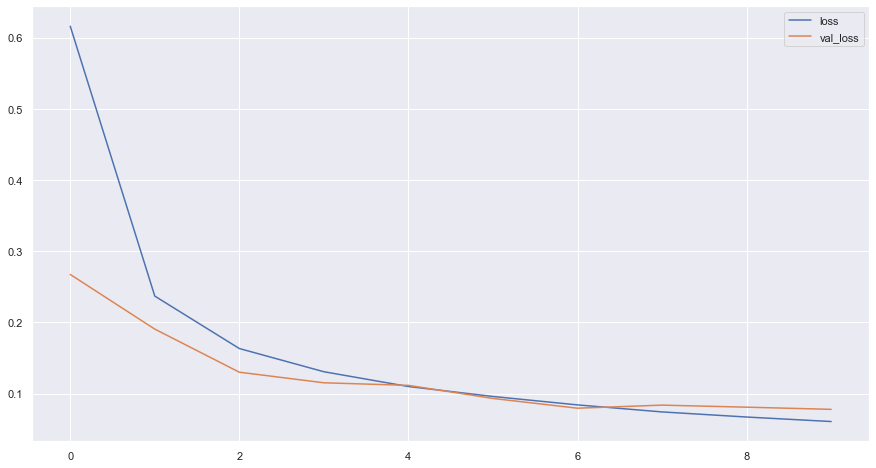

In [8]:
# plot loss 
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

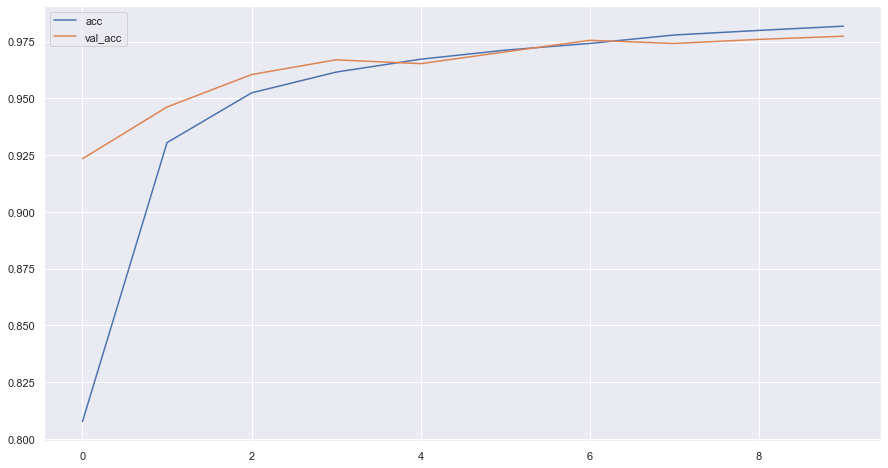

In [9]:
# Plot  accuracy 
plt.figure(figsize=(15,8))
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

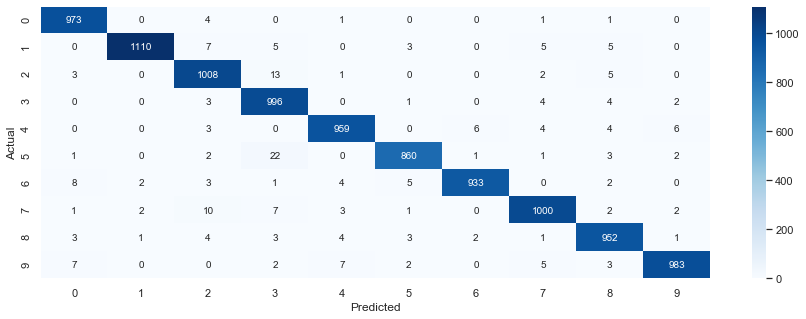

In [10]:
# confusion matrix
confusion = pd.DataFrame({'Actual':y_test,'Predicted':predict})
confusion_mat = confusion.groupby(['Actual','Predicted']).size().unstack(fill_value=0)
plt.figure(figsize=(15,5))
sns.heatmap(confusion_mat,annot=True,fmt='g',cmap='Blues')

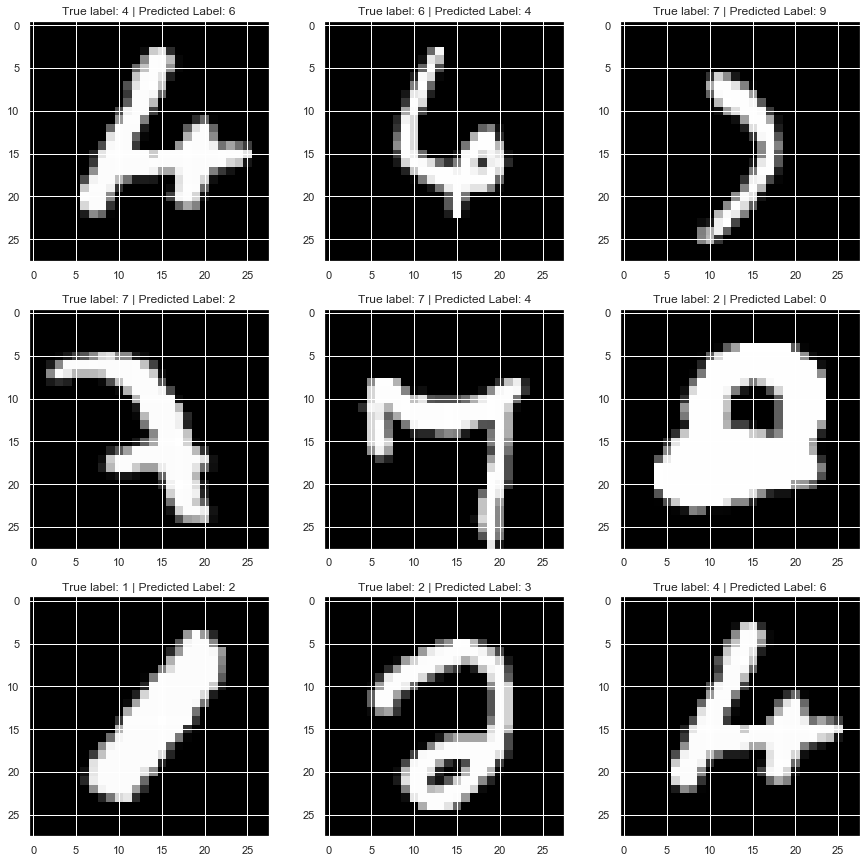

In [11]:
# index of Sample images where predictions are wrong
all_idx = np.where(y_test != predict)[0]
sample_idx = np.random.choice(all_idx,9)

# plot sample images
fig, axs = plt.subplots(3, 3,figsize=(15, 15))

# start idx
pos = 0
for row in range(3):
    for col in range(3):
        img_idx = sample_idx[pos]
        axs[row, col].imshow(X_test[img_idx], cmap='gray')
        axs[row,col].set_title("True label: {} | Predicted Label: {}".format(y_test[img_idx], predict[img_idx])) 
        pos = pos + 1

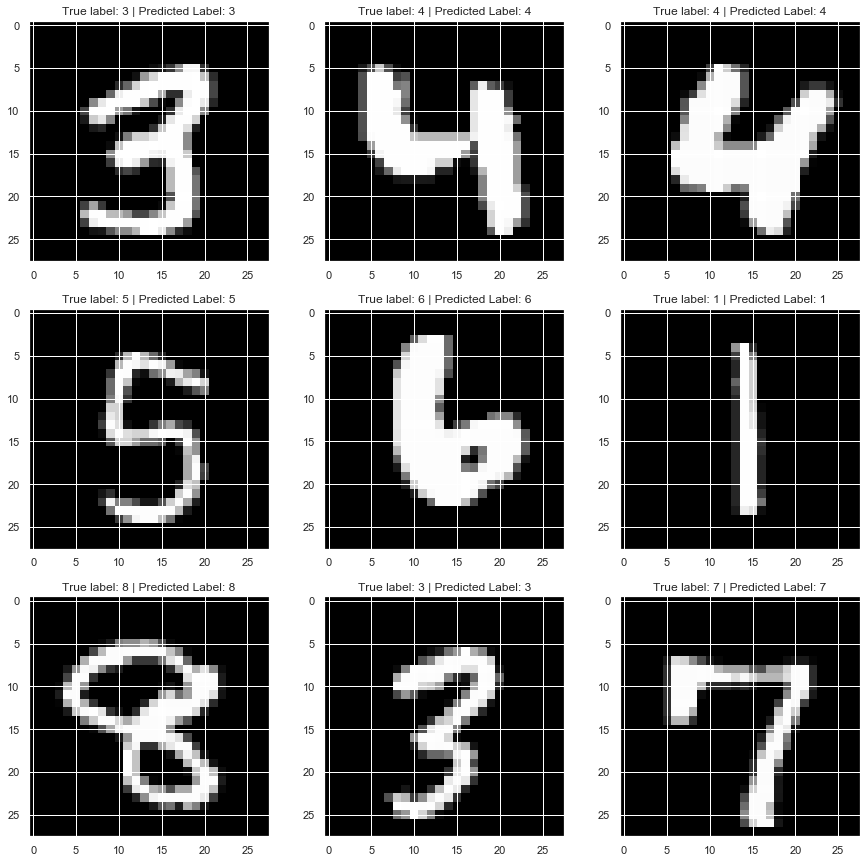

In [12]:
# index of Sample images where predictions are correct
all_idx = np.where(y_test == predict)[0]
sample_idx = np.random.choice(all_idx,9)

# plot sample images
fig, axs = plt.subplots(3, 3,figsize=(15, 15))

# start idx
pos = 0
for row in range(3):
    for col in range(3):
        img_idx = sample_idx[pos]
        axs[row, col].imshow(X_test[img_idx], cmap='gray')
        axs[row,col].set_title("True label: {} | Predicted Label: {}".format(y_test[img_idx], predict[img_idx])) 
        pos = pos + 1